In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

girl = imread('resources/girl.jpg')

plt.imshow(girl)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
def median_cut_quantize(img, img_arr):
    # when it reaches the end, color quantize
    r_average = np.mean(img_arr[:,0])
    g_average = np.mean(img_arr[:,1])
    b_average = np.mean(img_arr[:,2])
    
    represent_color_mapping = []
    for color in img_arr:
        represent_color_mapping.append([str(color[0])+"-"+str(color[1])+"-"+str(color[2])])
    
    for rindex, rows in enumerate(img):
        for cindex, color in enumerate(rows):
            key = str(color[0])+"-"+str(color[1])+"-"+str(color[2])
            if key in represent_color_mapping:
                img[rindex][cindex] = [r_average, g_average, b_average]

def split_into_buckets(img, img_arr, depth):
    
    if depth == 0 or len(img_arr) == 0:
        median_cut_quantize(img, img_arr)
        return
    
    print(len(img_arr))
    r_range = np.max(img_arr[:,0]) - np.min(img_arr[:,0])
    g_range = np.max(img_arr[:,1]) - np.min(img_arr[:,1])
    b_range = np.max(img_arr[:,2]) - np.min(img_arr[:,2])

    print(r_range, g_range, b_range)
    space_with_highest_range = 0

    if g_range >= r_range and g_range >= b_range:
        space_with_highest_range = 1
    elif b_range >= r_range and b_range >= g_range:
        space_with_highest_range = 2

    print("space_with_highest_range:",space_with_highest_range)

    # sort the image pixels by color space with highest range 
    # and find the median and divide the array.
    data = img_arr[:,space_with_highest_range]
    median_index = np.argsort(data)[len(data)//2]

    #split the array into two blocks
    split_into_buckets(img, img_arr[0:median_index], depth-1)
    split_into_buckets(img, img_arr[median_index:], depth-1)
    
w,h,s = girl.shape
flattened_girl = girl.reshape(w*h, s)
split_into_buckets(girl, flattened_girl, 4)

240000
255 255 255
space_with_highest_range: 1
54725
255 216 218
space_with_highest_range: 0
20426
164 180 194
space_with_highest_range: 2
34299
255 216 216
space_with_highest_range: 0
185275
255 255 255
space_with_highest_range: 1
66041
255 255 251
space_with_highest_range: 1
119234
218 251 253
space_with_highest_range: 2


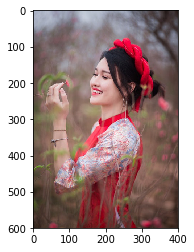

In [3]:
plt.imshow(girl)

In [4]:
from skimage.io import imsave

imsave('girl_reduced.jpg', girl)